In [1]:
from PIL import Image
import pytesseract
import cv2
import re
from Levenshtein import ratio
from hyperopt import tpe, hp, fmin, space_eval, STATUS_OK, Trials

import matplotlib.pyplot as plt
from skimage.exposure import adjust_gamma
import numpy as np
import math

C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\wojciech.blachowski\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
def ocr(img_path, params):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Resize?
    height = params['resize']
    img = cv2.resize(img, (int(img.shape[1]*height/img.shape[0]), height))
    
    #Binarize
    if params['binarize'][0]:
        args = params['binarize'][1]
        img = cv2.adaptiveThreshold(img, 255, args[0], cv2.THRESH_BINARY, args[1], args[2])
    
    #Noise removal
    if params['denoise'][0]:
        args = params['denoise'][1]
        img = cv2.fastNlMeansDenoising(img, args[0], args[1], args[2])
    
    #Dilatation and erosion
    if params['binarize'][0]:
        args = params['binarize'][-1]
        if args['erode'][0]:
            kernel_size = args['erode'][1]
            kernel = np.ones((kernel_size,kernel_size), np.uint8)
            img = cv2.erode(img, kernel)
        if args['dilate'][0]:
            kernel_size = args['dilate'][1]
            kernel = np.ones((kernel_size,kernel_size), np.uint8)
            img = cv2.dilate(img, kernel)

    
    plt.imshow(img,cmap='gray')
    plt.show()
    text = pytesseract.image_to_string(img, config="--psm 6").strip()
    text = re.sub('\s+', ' ', text)
    print(text)
    return text

def dissimilarity(img_path, text_path, params):
    ocr_result = ocr(img_path, params)
    with open(text_path) as file:
        expected_text = re.sub('\s+', ' ', file.read().strip())
    similarity =  ratio(ocr_result, expected_text)
    return 1 - similarity

def cummulative_dissimilarity(params):
    print(params)
    sum_=0
    for i in range(1,9):
        sum_+= dissimilarity(f'cutouts/{i}.jpg', f'texts/{i}.txt', params)
    return {'loss': sum_, 'status': STATUS_OK, 'params': params}

In [4]:
def hprange(name, start, stop, step=1):
    interval = stop-start
    stop = math.ceil(interval/step)
    return start + hp.randint(name, stop+1)*step

{'binarize': (True, (0, 19, 13), {'dilate': (True, 3), 'erode': (False,)}), 'denoise': (False,), 'resize': 107}
  0%|                                     | 0/10 [00:00<?, ?trial/s, best loss=?]

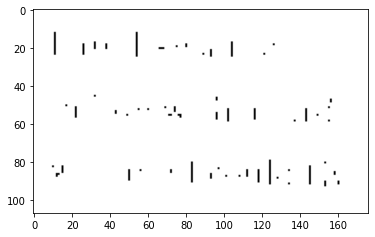

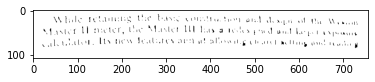

Wale fetinibg the tapes cobetta ten gid dopa at tie Wa esa Staster Eb seeter, Fie Mtaoster TUE do a testes pred uit Laepot aspuans earloelon. Pty fess Fecha Pes att aos hg ol tet a ting want tog
  0%|                                     | 0/10 [00:00<?, ?trial/s, best loss=?]

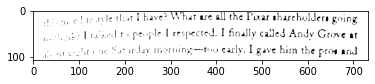

cog pe tlearyle that Thave? What are all the Pucar shareholders going cate TD icsed tepecple T respected. I finally cailed Andy Grove at grcehtese Saturday oorning-~teo early, [gave him the pros and
  0%|                                     | 0/10 [00:01<?, ?trial/s, best loss=?]

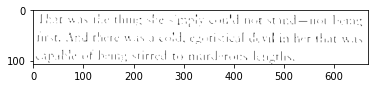

Pharwas the thins she iets Gaitd net stad ret Pera net. And there sais a cet cgecictoal fuvib ia ber that wats capable of betes stirred te oranderers bouerhs.
  0%|                                     | 0/10 [00:01<?, ?trial/s, best loss=?]

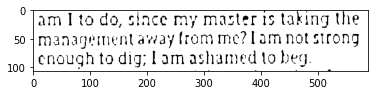

am Ito do, siace my masters taking the management avay from me? Lam not strong cnough to dig; Lamashamed to beg.
  0%|                                     | 0/10 [00:02<?, ?trial/s, best loss=?]

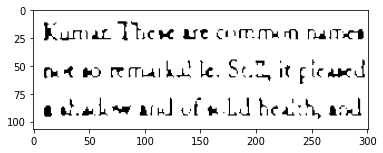

Kumar These are commen names met wo remarkat le. Sel) it picamed, eta ard ofeLd healsh, and
  0%|                                     | 0/10 [00:02<?, ?trial/s, best loss=?]

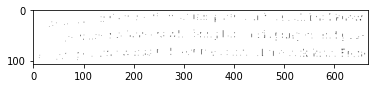

. . Ha poe ree bl Pie : hoon! nial boaetig nota : re rt lo Ky Prete              
  0%|                                     | 0/10 [00:03<?, ?trial/s, best loss=?]

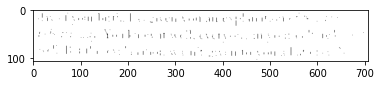

Niven Tare Sree Med ate pon! pes mo Yet b es apace Tevet Hever net 1 cs . ait ye Pek bap tvedp dear sent a bare
{'binarize': (True, (0, 23, 9), {'dilate': (False,), 'erode': (True, 1)}), 'denoise': (True, (7, 15, 9)), 'resize': 111}
 10%|█▏          | 1/10 [00:03<00:32,  3.62s/trial, best loss: 3.572732378144577]

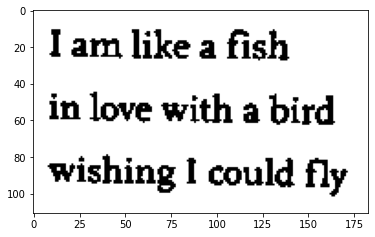

Jam like a fish in love with a bird wishing I could fly                          
 10%|█▏          | 1/10 [00:04<00:32,  3.62s/trial, best loss: 3.572732378144577]

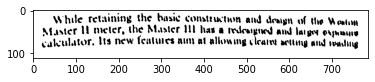

While retaining the basic construction and deagn of the Weaton Master LL aicter, (he Master HL has a redeaigned and latgor expanse calculator. Its new features aim at allowing cleat acting and reading
 10%|█▏          | 1/10 [00:04<00:32,  3.62s/trial, best loss: 3.572732378144577]

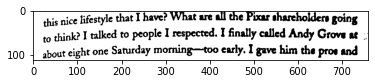

this nice lifestyle that I have? What are all the Pixar shareholders going to think? I talked to people I respected. I finally called Andy Grove at about eight one Saturday momning—too early. I gave him the pros and
 10%|█▏          | 1/10 [00:05<00:32,  3.62s/trial, best loss: 3.572732378144577]

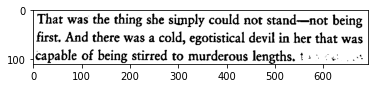

That was the thing she simply could not stand—not being first. And there was a cold, egotistical devil in her that was capable of being stirred to murderous lengths, ¢ >: <s: ..:
 10%|█▏          | 1/10 [00:06<00:32,  3.62s/trial, best loss: 3.572732378144577]

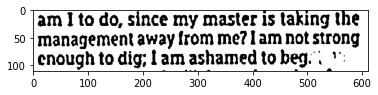

am I to do, since my master 1s taking the management away from me? Iam not strong enough to dig; 1am ashamed to beg... +:
 10%|█▏          | 1/10 [00:06<00:32,  3.62s/trial, best loss: 3.572732378144577]

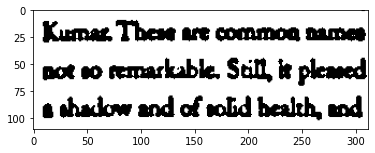

not eo remarkable, Still, it pleased 0 shadow and of solid health, and           
 10%|█▏          | 1/10 [00:07<00:32,  3.62s/trial, best loss: 3.572732378144577]

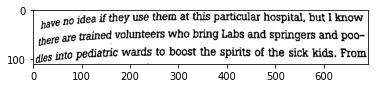

nave no idea if they use them at this particular hospital, but | know there are trained volunteers who bring Labs and springers and poo- dies into pediatric wards to boost the spirits of the sick kids. From
 10%|█▏          | 1/10 [00:07<00:32,  3.62s/trial, best loss: 3.572732378144577]

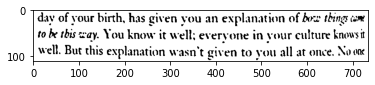

day of your birth, has given you an explanation of bow thing wm to be this way. You know it well; everyone in your culture knows it welt. But this explanation wasn't given to you all at once. No ore
{'binarize': (False,), 'denoise': (True, (1, 17, 13)), 'resize': 76}             
 20%|██        | 2/10 [00:08<00:35,  4.42s/trial, best loss: 0.49134768572273524]

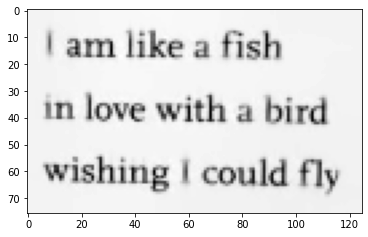

| am like a fish in love with a bird wishing | could fly                         
 20%|██        | 2/10 [00:09<00:35,  4.42s/trial, best loss: 0.49134768572273524]

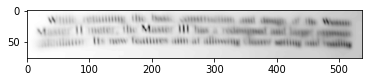

AL Stee HE raater, the Mivater ne - Fiat The new Fea tiiven ait at alliage       
 20%|██        | 2/10 [00:09<00:35,  4.42s/trial, best loss: 0.49134768572273524]

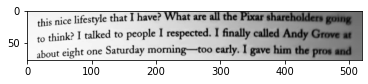

this nice lifestyle that I have? What are all the to think? I talked to people I respected. I finally y about eight one Saturday morning—too early. I gave him
 20%|██        | 2/10 [00:10<00:35,  4.42s/trial, best loss: 0.49134768572273524]

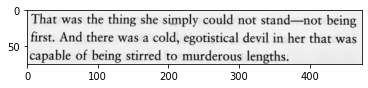

That was the thing she simply could not stand—not being first. And there was a cold, egotistical devil in her that was capable of being stirred to murderous lengths.
 20%|██        | 2/10 [00:10<00:35,  4.42s/trial, best loss: 0.49134768572273524]

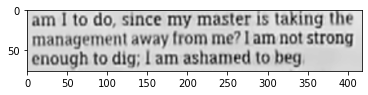

am | to do, since my master is taking the management away from me? lam not strong enough to dig; | am ashamed to beg
 20%|██        | 2/10 [00:11<00:35,  4.42s/trial, best loss: 0.49134768572273524]

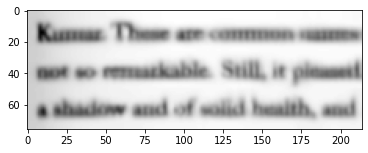

Masse rene arr orrreeens caren ot > rermeachale ull + pm ease uct of mata! health am
 20%|██        | 2/10 [00:11<00:35,  4.42s/trial, best loss: 0.49134768572273524]

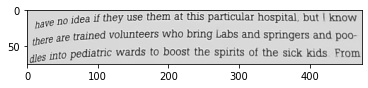

nave no idea if they use them at this particular hospital, but | know there are trained volunteers who bring Labs and springers and poo- ges into pediatric wards to boost the spirits of the sick kids From
 20%|██        | 2/10 [00:12<00:35,  4.42s/trial, best loss: 0.49134768572273524]

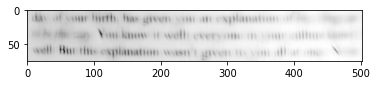

SE ae optima a Tewwalll) ewer Hy oH) OHI ee Nae giweHH He ni tHar ome N          
{'binarize': (False,), 'denoise': (True, (3, 25, 7)), 'resize': 52}              
 30%|███       | 3/10 [00:12<00:30,  4.34s/trial, best loss: 0.49134768572273524]

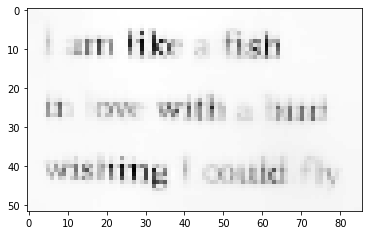

an like» fish                                                                    
 30%|███       | 3/10 [00:13<00:30,  4.34s/trial, best loss: 0.49134768572273524]

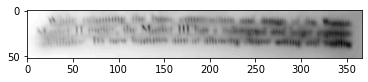

Sa                                                                               
 30%|███       | 3/10 [00:13<00:30,  4.34s/trial, best loss: 0.49134768572273524]

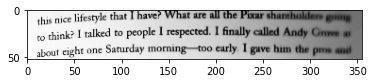

‘this nice lifestyle that I have? What are alt ees to think? Ltalked to people I respected. I finally tout eight one Saturday morning—too early. T gave
 30%|███       | 3/10 [00:14<00:30,  4.34s/trial, best loss: 0.49134768572273524]

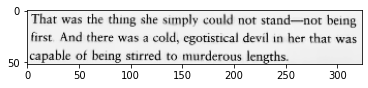

‘That was the thing she simply could not stand—not being, first And there was a cold, egotistical devil in her that was Gapuble of Geng siiczed to mmederova lexaie.
 30%|███       | 3/10 [00:14<00:30,  4.34s/trial, best loss: 0.49134768572273524]

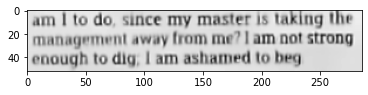

am | to do, since my master is taking the ‘managemwnt away from me? lam not strong ‘enough to dig, | am ashamed to beg
 30%|███       | 3/10 [00:15<00:30,  4.34s/trial, best loss: 0.49134768572273524]

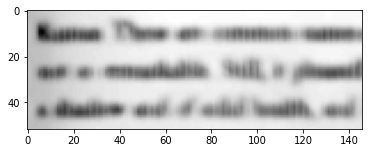

Ce tee ent Riahe os 6 atsuath ot                                                 
 30%|███       | 3/10 [00:15<00:30,  4.34s/trial, best loss: 0.49134768572273524]

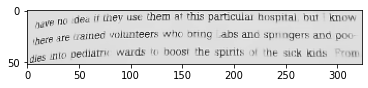

wo no «dea if they use them at this particular hospital, but | know pare e caine volUNeers Who 9TING abs ano soringers ana pec vento pediatr wards 10 boost the spirits of the sick kids, ro
 30%|███       | 3/10 [00:15<00:30,  4.34s/trial, best loss: 0.49134768572273524]

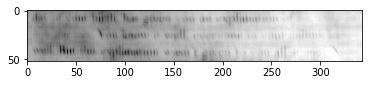

i‘ , —                                                                           
{'binarize': (False,), 'denoise': (True, (1, 23, 9)), 'resize': 55}              
 40%|████      | 4/10 [00:16<00:23,  3.96s/trial, best loss: 0.49134768572273524]

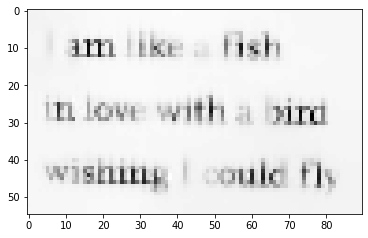

In low with na wisung, | ou thy                                                  
 40%|████      | 4/10 [00:16<00:23,  3.96s/trial, best loss: 0.49134768572273524]

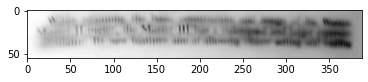

Sa                                                                               
 40%|████      | 4/10 [00:16<00:23,  3.96s/trial, best loss: 0.49134768572273524]

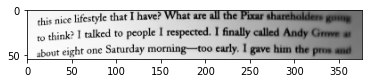

this nice lifestyle that I have? What are all the to think? I talked to people I respected. I finaly bout eight one Saturday morning—too early. I gave!
 40%|████      | 4/10 [00:17<00:23,  3.96s/trial, best loss: 0.49134768572273524]

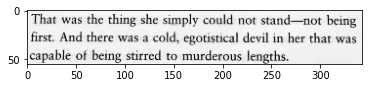

‘That was the thing she simply could not stand—not being first. And there was a cold, egotistical devil in her that was capable of being stirred to murderous lengths.
 40%|████      | 4/10 [00:17<00:23,  3.96s/trial, best loss: 0.49134768572273524]

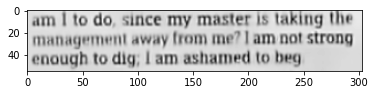

am | to do, since my master Is taking the management away from me? lam not strong enough to dig; | am ashamed to beg
 40%|████      | 4/10 [00:18<00:23,  3.96s/trial, best loss: 0.49134768572273524]

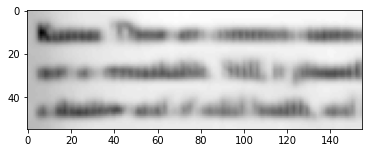

ee ee SO as. 4 atta os                                                           
 40%|████      | 4/10 [00:18<00:23,  3.96s/trial, best loss: 0.49134768572273524]

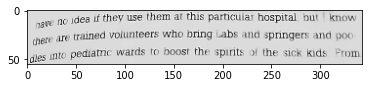

pave nodes it they tse them at‘this particillar hospital, bait T know here are rained volunteers who ring Labs and springers ana poc sine into pediatic wards 10 boost the spints of the sick kids: Srom
 40%|████      | 4/10 [00:19<00:23,  3.96s/trial, best loss: 0.49134768572273524]

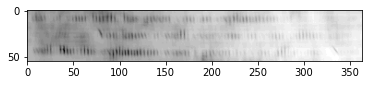

a                                                                                
{'binarize': (True, (1, 15, 10), {'dilate': (True, 1), 'erode': (True, 1)}), 'denoise': (False,), 'resize': 107}
 50%|█████     | 5/10 [00:19<00:18,  3.73s/trial, best loss: 0.49134768572273524]

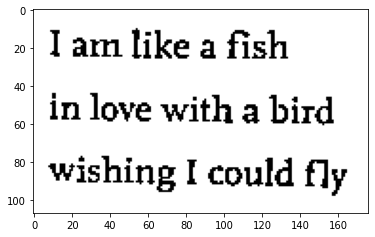

Lam like a fish in love with a bird wishing I could fly                          
 50%|█████     | 5/10 [00:19<00:18,  3.73s/trial, best loss: 0.49134768572273524]

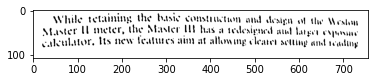

While tetiining the basic constraction and design of the Weston Master EL imeter, the Master UP tas a tedesipned: and fatger exponiie calcubuior, bts new features ding at alow ing clearer setting and teading
 50%|█████     | 5/10 [00:20<00:18,  3.73s/trial, best loss: 0.49134768572273524]

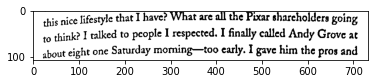

this nice lifestyle that I have? What are all the Pixar sharcholders going to think? I talked to people I respected. I finally called Andy Grove at about eight one Saturday moming—too early. I gave him the pros and
 50%|█████     | 5/10 [00:20<00:18,  3.73s/trial, best loss: 0.49134768572273524]

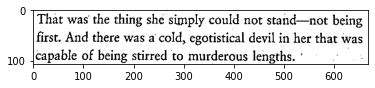

That was the thing she simply could not stand—not being first. And there was'a' cold, egotistical devil in her that was capable of being stirred to murderous lengths. ° ms
 50%|█████     | 5/10 [00:21<00:18,  3.73s/trial, best loss: 0.49134768572273524]

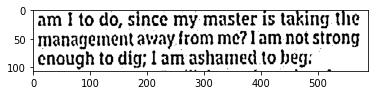

am I to do, since my master Is taking the management aveay from me? lam not strong enough to dig; lamashamed to beg:
 50%|█████     | 5/10 [00:21<00:18,  3.73s/trial, best loss: 0.49134768572273524]

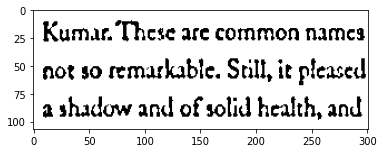

Kumar. These are common names not so remarkable. Still, it pleased a shadow and of solid health, and
 50%|█████     | 5/10 [00:21<00:18,  3.73s/trial, best loss: 0.49134768572273524]

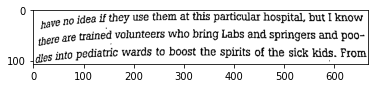

nave no idea if they use them at this particular hospital, but 1 know there are trained volunteers who bring Labs and springers and poo- gles into pediatric wards to boost the spirits of the sick kids. From
 50%|█████     | 5/10 [00:22<00:18,  3.73s/trial, best loss: 0.49134768572273524]

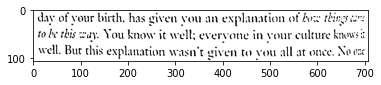

day of your birth, has given vou an explanation of Foy thing or to be this cay. You know it well; evervone in your culture knows well. Burt this explanation wasn't given to vou all at once, Noes
{'binarize': (False,), 'denoise': (True, (7, 15, 7)), 'resize': 133}             
 60%|██████▌    | 6/10 [00:22<00:14,  3.58s/trial, best loss: 0.3574351365177246]

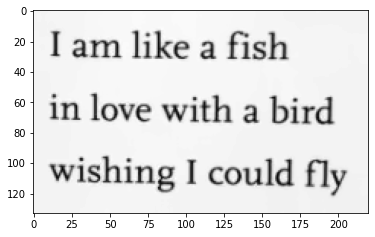

Iam like a fish in love with a bird wishing I could fly                          
 60%|██████▌    | 6/10 [00:23<00:14,  3.58s/trial, best loss: 0.3574351365177246]

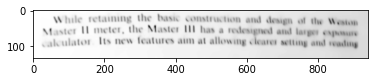

While retaiming the basi construction and design of the Weston Mtaster UH meter, the Master 1H has a TS larger Calculator [Ls new features aim at alloweng ¢ setting r~ ~
 60%|██████▌    | 6/10 [00:23<00:14,  3.58s/trial, best loss: 0.3574351365177246]

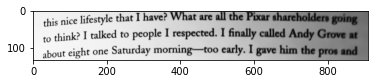

this nice lifestyle that I have? What are all the Pixar to think? I talked to people I respected. I finally called about eight one Saturday morning—too early. 1 gave him
 60%|██████▌    | 6/10 [00:24<00:14,  3.58s/trial, best loss: 0.3574351365177246]

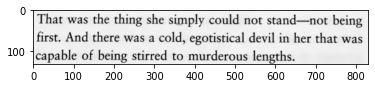

That was the thing she simply could not stand—not being first. And there was a cold, egotistical devil in her that was capable of being stirred to murderous lengths.
 60%|██████▌    | 6/10 [00:25<00:14,  3.58s/trial, best loss: 0.3574351365177246]

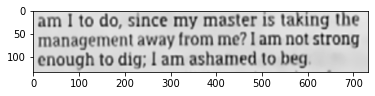

am | to do, since my master is taking the management away from me? lam not strong enough to dig; |am ashamed to beg. —
 60%|██████▌    | 6/10 [00:25<00:14,  3.58s/trial, best loss: 0.3574351365177246]

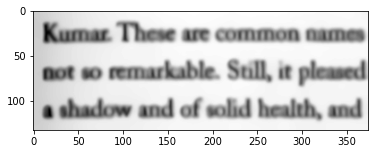

Kumar These are common names got so remarkable. Sull, it pleased 0 shadow and of solid health, and
 60%|██████▌    | 6/10 [00:26<00:14,  3.58s/trial, best loss: 0.3574351365177246]

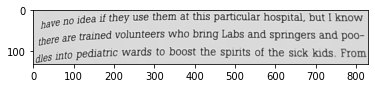

nave no idea if they use them at this particular hospital, but I know there are trained volunteers who bring Labs and springers and poo- dles into pediatric wards to boost the spints of the sick kids. From
 60%|██████▌    | 6/10 [00:27<00:14,  3.58s/trial, best loss: 0.3574351365177246]

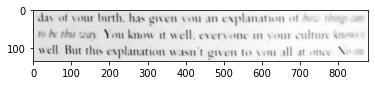

day of vour birth, has given vou an explanation ot F to be ths way You know it well, evervone in your culture knows well But this explanation wasn't given to vou all atone: \
{'binarize': (True, (1, 19, 12), {'dilate': (False,), 'erode': (True, 5)}), 'denoise': (False,), 'resize': 52}
 70%|███████▋   | 7/10 [00:27<00:12,  4.03s/trial, best loss: 0.3574351365177246]

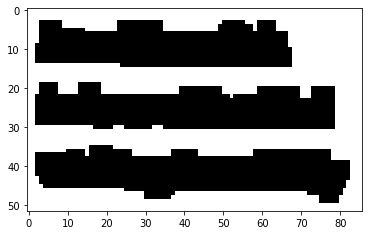

—                                                                                
 70%|███████▋   | 7/10 [00:28<00:12,  4.03s/trial, best loss: 0.3574351365177246]

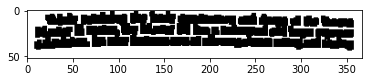

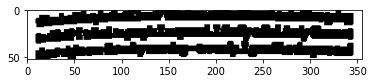

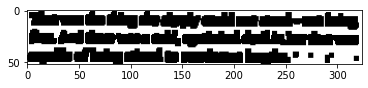

pee re                                                                           
 70%|███████▋   | 7/10 [00:29<00:12,  4.03s/trial, best loss: 0.3574351365177246]

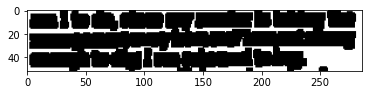

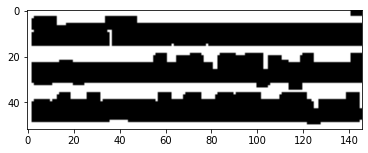

— aa                                                                             
 70%|███████▋   | 7/10 [00:29<00:12,  4.03s/trial, best loss: 0.3574351365177246]

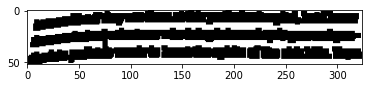

_                                                                                
 70%|███████▋   | 7/10 [00:29<00:12,  4.03s/trial, best loss: 0.3574351365177246]

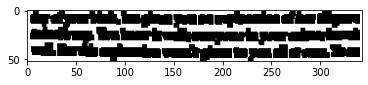

ahedey Sater iecvenpersprainatd                                                  
{'binarize': (True, (1, 15, 10), {'dilate': (True, 3), 'erode': (False,)}), 'denoise': (True, (9, 19, 5)), 'resize': 82}
 80%|████████▊  | 8/10 [00:30<00:07,  3.53s/trial, best loss: 0.3574351365177246]

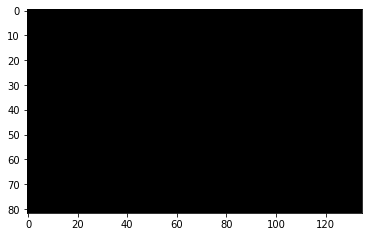

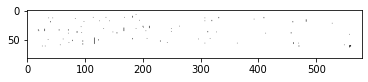

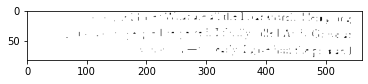

eli Waal the Doar easesi leo ra \ re MELA Gene a: we bene han diegs sacl         
 80%|████████▊  | 8/10 [00:31<00:07,  3.53s/trial, best loss: 0.3574351365177246]

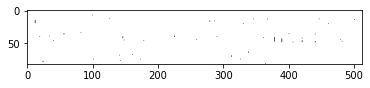

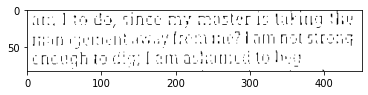

ai )te de, since my masteris tibia tie Tian gentichiiatenot! fei? Pam not seo g cneegh tadig: bam anim le hea
 80%|████████▊  | 8/10 [00:32<00:07,  3.53s/trial, best loss: 0.3574351365177246]

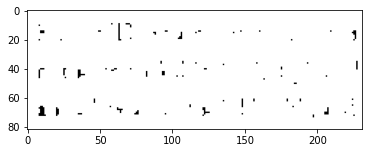

: ova 4 ropa ' ay tore st 1                                                      
 80%|████████▊  | 8/10 [00:32<00:07,  3.53s/trial, best loss: 0.3574351365177246]

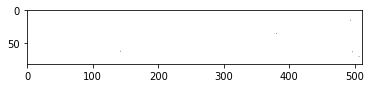

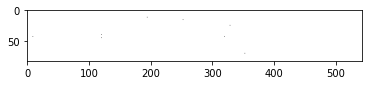

{'binarize': (True, (0, 15, 9), {'dilate': (False,), 'erode': (False,)}), 'denoise': (False,), 'resize': 151}
 90%|█████████▉ | 9/10 [00:33<00:03,  3.50s/trial, best loss: 0.3574351365177246]

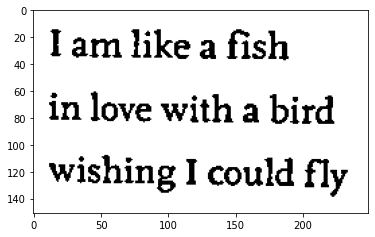

Tam like a fish in love with a bird wishing I could fly                          
 90%|█████████▉ | 9/10 [00:34<00:03,  3.50s/trial, best loss: 0.3574351365177246]

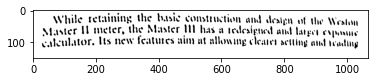

While retaining the basic construction and desyn of the Weston Master Hoaneter, the Master HI has a tedeslpned and larger eX pais calculator, Hs new features ali at allowing cleater setting and peading
 90%|█████████▉ | 9/10 [00:34<00:03,  3.50s/trial, best loss: 0.3574351365177246]

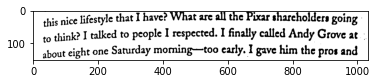

this nice lifestyle that I have? What are all the Pixar sharcholders going - to think? I talked to people I respected. I finally called Andy Grove at . about eight one Saturday moming—too early. I gave him the pros and
 90%|█████████▉ | 9/10 [00:34<00:03,  3.50s/trial, best loss: 0.3574351365177246]

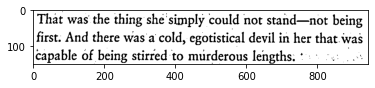

That was the thing she’ simply could not stand—not being first. And there was'a cold, egotistical devil in her that. was capable of being stirred ‘to murderous lengths; +: ~ 7: .
 90%|█████████▉ | 9/10 [00:35<00:03,  3.50s/trial, best loss: 0.3574351365177246]

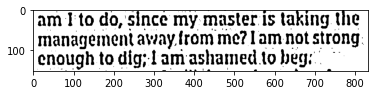

am Ito do,'since my master is taking. the management away from me? Lam not strong: enough to dig; Lamashamed to beg: ~
 90%|█████████▉ | 9/10 [00:35<00:03,  3.50s/trial, best loss: 0.3574351365177246]

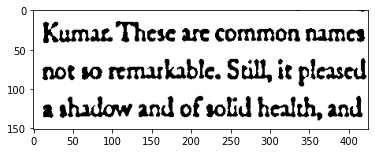

Kumar. These are commen names not so remarkable. Still, it pleased a shadow and of solid health, and
 90%|█████████▉ | 9/10 [00:36<00:03,  3.50s/trial, best loss: 0.3574351365177246]

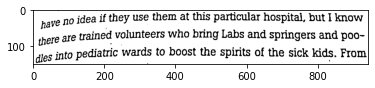

have no idea if they use them at this particular hospital, but I know there are trained volunteers who bring Labs and springers and poo- dies into pediatric wards to boost the spirits of the sick kids. From
 90%|█████████▉ | 9/10 [00:36<00:03,  3.50s/trial, best loss: 0.3574351365177246]

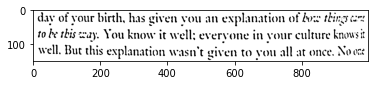

day of your birth, has given vou an explanation of bow thing cn to be this czay. You know it well: evervone in vour culture knows well, But this explanation wasn't given to you all at once. No ez
100%|██████████| 10/10 [00:37<00:00,  3.74s/trial, best loss: 0.3574351365177246]


In [5]:
search_space = {
    'resize': hprange('resize', 50, 200),
    "binarize": hp.choice(
        "binarize",
        [
            (
                True,
                (
                    hp.choice(
                        "binarize_algorithm",
                        [cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.ADAPTIVE_THRESH_MEAN_C],
                    ),
                    hprange("binarize_blocksize", 15, 27, 2),
                    hprange("binarize_c", 8, 13),
                ),
                {
                    "dilate": hp.choice(
                        "dilate", [(True, hprange('dilate_kernel', 1, 4, 2)), (False,)]
                    ),
                    "erode": hp.choice(
                        "erode", [(True, hprange('erode_kernel', 1, 4, 2)), (False,)]
                    ),
                },
            ),
            (False,),
        ],
    ),
    "denoise": hp.choice(
        "denoise",
        [
            (
                True,
                (
                    hprange('denoise_h', 1,8,2),
                    hprange('denoise_windowsize', 15, 26, 2),
                    hprange('denoise_blocksize', 5, 12, 2)
                ),
            ),
            (False,),
        ],
    ),
}
trials = Trials()
best = fmin(cummulative_dissimilarity, search_space, algo=tpe.suggest, max_evals=10, trials=trials)

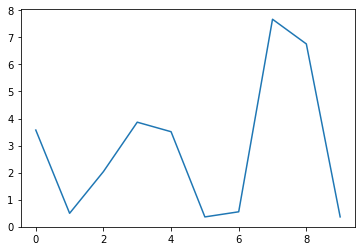

In [6]:
import matplotlib.pyplot as plt
plt.plot(trials.losses())

In [7]:
import hyperopt.pyll.stochastic
print(hyperopt.pyll.stochastic.sample(search_space))

{'binarize': (False,), 'denoise': (True, (3, 15, 7)), 'resize': 71}


In [8]:
space_eval(search_space, best)

{'binarize': (True, (1, 15, 10), {'dilate': (True, 1), 'erode': (True, 1)}),
 'denoise': (False,),
 'resize': 107}

{'binarize': (True, (1, 15, 10), {'dilate': (True, 1), 'erode': (True, 1)}), 'denoise': (False,), 'resize': 107}


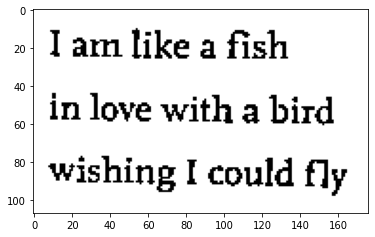

Lam like a fish in love with a bird wishing I could fly


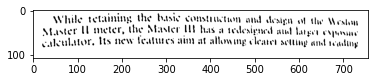

While tetiining the basic constraction and design of the Weston Master EL imeter, the Master UP tas a tedesipned: and fatger exponiie calcubuior, bts new features ding at alow ing clearer setting and teading


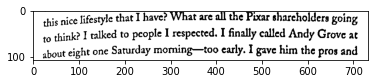

this nice lifestyle that I have? What are all the Pixar sharcholders going to think? I talked to people I respected. I finally called Andy Grove at about eight one Saturday moming—too early. I gave him the pros and


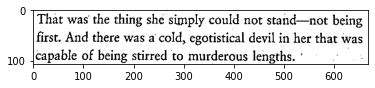

That was the thing she simply could not stand—not being first. And there was'a' cold, egotistical devil in her that was capable of being stirred to murderous lengths. ° ms


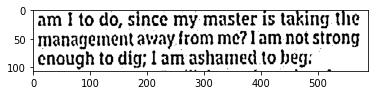

am I to do, since my master Is taking the management aveay from me? lam not strong enough to dig; lamashamed to beg:


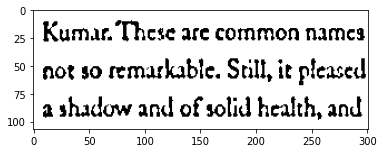

Kumar. These are common names not so remarkable. Still, it pleased a shadow and of solid health, and


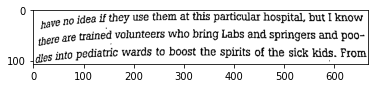

nave no idea if they use them at this particular hospital, but 1 know there are trained volunteers who bring Labs and springers and poo- gles into pediatric wards to boost the spirits of the sick kids. From


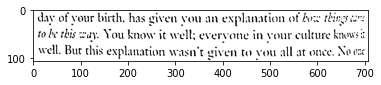

day of your birth, has given vou an explanation of Foy thing or to be this cay. You know it well; evervone in your culture knows well. Burt this explanation wasn't given to vou all at once, Noes


{'loss': 0.3574351365177246,
 'status': 'ok',
 'params': {'binarize': (True,
   (1, 15, 10),
   {'dilate': (True, 1), 'erode': (True, 1)}),
  'denoise': (False,),
  'resize': 107}}

In [9]:
cummulative_dissimilarity(space_eval(search_space, best))